# 사용할 atals 가져오기

In [1]:
# atlas 가져오기
from nilearn import image
atlas_img = image.load_img('D:/fmri/3. derivatives 폴더에 넣어야 하는 것 (전처리 후 데이터, MNI 템플릿)/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-02_atlas-HOCPA_desc-th25_dseg.nii.gz')

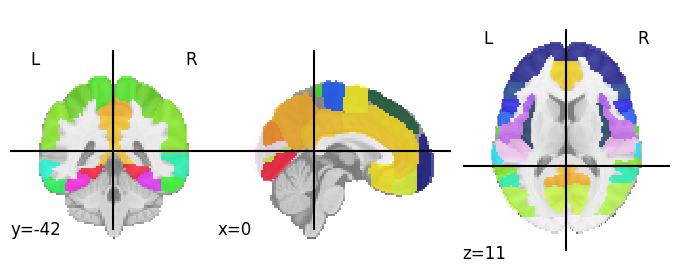

In [2]:
from nilearn import plotting
plotting.plot_roi(atlas_img)

# 나누었던 참가자 데이터 가져와서 확인하기

참가자 데이터 가져오고 각 참가자 데이터에 masking을 시행, masking으로 얻은 voxel들의 roi 영역을 feauture name으로 사용. 모든 참가자 데이터의 voxel 수가 같은지 확인

In [3]:
# 참가자 데이터 가져오기
from nilearn.maskers import NiftiMasker
import numpy as np
import pandas as pd

'''
'2207071', '2207141', '2207142', '2207143', '2207271', '2207272', '2207273',
          '2208041', '2208042', '2208043', '2208231', '2208232', '2208233', '2209022',
          '2209023', '2209222', '2209223', '2303101', '2303102', '2303103', '2303131',
          '2303132', '2303133', '2303161', '2303162', '2303163', '2303201', '2303202', '2303203'
'''

sub_ids = ['2207071', '2207141', '2207142', '2207143', '2207271', '2207272', '2207273',
          '2208041', '2208042', '2208043', '2208231', '2208232', '2208233', '2209022',
          '2209023', '2209222', '2209223', '2303101', '2303102', '2303103', '2303131',
          '2303132', '2303133', '2303161', '2303162', '2303163', '2303201', '2303202', '2303203']

sub_path = 'D:/fmri/rjc_down/ID{}_rjc_down.nii.gz'
masking_list = []


for id in sub_ids:
    file_path = sub_path.format(id)
    fmri_file = image.load_img(file_path)
    print(f"{id}'s shape :", fmri_file.get_fdata().shape)

    # resample
    resampled_roi = image.resample_to_img(atlas_img, image.mean_img(fmri_file), interpolation='nearest')
    img_roi = image.math_img('img>0', img=resampled_roi)

    # masking
    masker = NiftiMasker(mask_img = img_roi, standardize=False, detrend=False, memory='nilearn_cache', memory_level=2)
    X_roi = masker.fit_transform(fmri_file)
    print(f"{id}'s masking shape:", X_roi.shape)

    # unmasking
    masked_epi = masker.inverse_transform(X_roi)

    # roi index
    unmasking_data = img_roi.get_fdata()
    voxel_coord = np.argwhere(unmasking_data > 0)
    atlas_data = resampled_roi.get_fdata()

    voxel_labels = [atlas_data[x,y,z] for x,y,z in voxel_coord]
    x_c, y_c, z_c = zip(*voxel_coord)
    feature_names = [f'Voxel_{x}_{y}_{z}_{label}' for x,y,z, label in zip(x_c, y_c, z_c, voxel_labels)]

    X_roi_df = pd.DataFrame(X_roi, columns = feature_names)
    masking_list.append(X_roi_df)
    

    

2207071's shape : (65, 77, 65, 44)
2207071's masking shape: (44, 41394)
2207141's shape : (65, 77, 65, 42)
2207141's masking shape: (42, 41394)
2207142's shape : (65, 77, 65, 22)
2207142's masking shape: (22, 41394)
2207143's shape : (65, 77, 65, 54)
2207143's masking shape: (54, 41394)
2207271's shape : (65, 77, 65, 44)
2207271's masking shape: (44, 41394)
2207272's shape : (65, 77, 65, 50)
2207272's masking shape: (50, 41394)
2207273's shape : (65, 77, 65, 52)
2207273's masking shape: (52, 41394)
2208041's shape : (65, 77, 65, 28)
2208041's masking shape: (28, 41394)
2208042's shape : (65, 77, 65, 42)
2208042's masking shape: (42, 41394)
2208043's shape : (65, 77, 65, 66)
2208043's masking shape: (66, 41394)
2208231's shape : (65, 77, 65, 58)
2208231's masking shape: (58, 41394)
2208232's shape : (65, 77, 65, 46)
2208232's masking shape: (46, 41394)
2208233's shape : (65, 77, 65, 44)
2208233's masking shape: (44, 41394)
2209022's shape : (65, 77, 65, 62)
2209022's masking shape: (62,

In [4]:
# 같은 좌표로 다같이 뽑혔는지 확인

for i in range(len(masking_list)-1):
    if masking_list[i].columns.equals(masking_list[i+1].columns):
        print(f"{i}'s and {i+1}'s are equall")

0's and 1's are equall
1's and 2's are equall
2's and 3's are equall
3's and 4's are equall
4's and 5's are equall
5's and 6's are equall
6's and 7's are equall
7's and 8's are equall
8's and 9's are equall
9's and 10's are equall
10's and 11's are equall
11's and 12's are equall
12's and 13's are equall
13's and 14's are equall
14's and 15's are equall
15's and 16's are equall
16's and 17's are equall
17's and 18's are equall
18's and 19's are equall
19's and 20's are equall
20's and 21's are equall
21's and 22's are equall
22's and 23's are equall
23's and 24's are equall
24's and 25's are equall
25's and 26's are equall
26's and 27's are equall
27's and 28's are equall


In [6]:
X_final = pd.concat(masking_list, axis=0, ignore_index=True)
X_final

,Voxel_8_35_21_12.0,Voxel_8_35_22_12.0,Voxel_8_36_21_12.0,Voxel_8_36_22_12.0,Voxel_9_26_25_13.0,Voxel_9_26_26_13.0,Voxel_9_26_27_13.0,Voxel_9_26_28_13.0,Voxel_9_27_23_13.0,Voxel_9_27_24_13.0,...,Voxel_56_36_21_12.0,Voxel_56_36_22_12.0,Voxel_56_36_23_12.0,Voxel_56_36_24_12.0,Voxel_56_37_21_12.0,Voxel_56_37_22_12.0,Voxel_56_37_23_12.0,Voxel_56_38_21_12.0,Voxel_56_38_22_12.0,Voxel_56_38_23_12.0
0,1.507400,-0.601113,0.660426,-0.335034,-1.192392,-0.698698,0.972310,0.161684,-1.516073,-0.834315,...,0.686372,0.374439,-0.402440,-0.936546,-0.760620,1.093342,0.771237,0.169006,-0.327198,-1.059509
1,-0.188126,0.928904,-1.398372,-0.252456,0.101955,-0.562649,-1.154409,-0.972037,0.415195,-0.581284,...,-0.939542,-0.405766,1.316262,2.083075,1.516297,-1.378988,-0.946670,-1.123933,-0.273738,-1.022465
2,0.937413,-1.745342,-0.023158,0.112263,-0.478764,-1.163611,0.400505,0.075339,-0.243453,-2.271591,...,-1.098028,-0.457063,-1.103380,-1.699737,-1.590533,-0.478821,0.232192,-2.330546,0.198661,-0.745654
3,-0.745454,1.945973,-1.308416,-0.175985,0.465826,2.368122,1.403908,-0.760068,0.484353,0.933705,...,-2.286249,-0.410552,2.096753,0.954357,1.151405,-0.224133,-1.701686,0.732539,-0.298224,0.871288
4,-1.051767,-0.147698,0.605671,-0.220658,0.487763,-0.721804,-1.101519,-0.866024,-0.366316,0.305981,...,0.456379,-0.023544,-0.672766,-0.743134,0.658525,-0.012901,-0.754965,-1.015004,-0.589816,-0.086558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1473,0.197401,-0.346888,0.315428,-1.518900,0.782680,1.139491,-0.743389,-1.111745,0.639297,0.092713,...,-0.159871,-0.334187,-0.313083,-1.205283,-0.156957,-0.082242,-0.626339,0.748096,0.326665,-0.384014
1474,0.630280,-0.436849,-0.202905,-1.228211,1.988174,1.453450,0.366855,-0.289936,0.430046,0.562635,...,0.488631,2.152690,-0.350709,-1.931818,-0.435911,-0.121517,-0.160004,0.993298,-0.385456,-0.966144
1475,0.404768,0.574483,-0.303108,0.838650,0.595448,-1.103234,-0.803891,-0.140063,-0.444657,0.378921,...,-0.813438,0.700686,0.250248,-0.755072,-0.516503,2.114712,1.267636,0.362657,0.596762,-0.370489
1476,-0.065468,0.040626,0.012333,0.150864,-0.235641,-0.766017,0.188119,0.562680,-1.044057,-0.086487,...,1.245497,1.092895,-0.736768,-1.281076,-0.389574,-1.834060,-1.788970,0.311405,0.107110,0.568094


In [7]:
total_rows = sum(df.shape[0] for df in masking_list)
total_rows

1478

In [8]:
# chunk 생성

chunk = np.concatenate([[i]*(masking_list[i].shape[0]) for i in range(len(masking_list))])
len(chunk)

1478

In [9]:
np.unique(chunk)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [10]:
# y 가져오기
onset_path = 'D:/fmri/rjc_down/y/ID{}_rjc_down_y.csv'

onset_list = []

for sub_id in sub_ids:
    file_path = onset_path.format(sub_id)
    onset_file = pd.read_csv(file_path)
    
    onset_list.append(onset_file)

In [11]:
onset_y = np.concatenate(onset_list)
y = onset_y.ravel()
y.shape

(1478,)

# RF 시행

In [12]:
# RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, KFold

In [13]:
X_train, X_test, y_train, y_test, c_train, c_test = train_test_split(X_final, y, chunk,
                                                                     test_size=0.4, random_state=42, shuffle=False)

In [14]:
print('Shapes of X:', X_train.shape, X_test.shape)
print('Shapes of y:', y_train.shape, y_test.shape)

Shapes of X: (886, 41394) (592, 41394)
Shapes of y: (886,) (592,)


In [26]:
RF_param = {'n_estimators' :[100, 150, 200],
            'max_depth':[30, 50, 100],
            'min_samples_split':[1, 2],
           'min_samples_leaf':[1,3],
           'max_features':['sqrt'],
           'bootstrap':[True],
           'criterion':['gini']}

RF = RandomForestClassifier(random_state=42)
kf = KFold(n_splits=5)

grid_RF_log = GridSearchCV(RF, RF_param, cv=kf,
                           return_train_score=True, refit=True, n_jobs=10, verbose=1)

In [27]:
RF_model = grid_RF_log.fit(X_train, y_train, groups=c_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [28]:
RF_model.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [35]:
fin_RF = RandomForestClassifier(random_state=42, bootstrap=True, criterion='gini',
                               max_depth=50, max_features='sqrt', min_samples_leaf=1,
                               min_samples_split=2, n_estimators=150, n_jobs=10)
fin_RF_model = fin_RF.fit(X_train, y_train)

In [36]:
pred_RF = fin_RF_model.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

confusion = confusion_matrix(y_test, pred_RF)
accuracy = accuracy_score(y_test, pred_RF)
recall = recall_score(y_test, pred_RF)
precision = precision_score(y_test, pred_RF)

print('혼동행렬 : \n',
      confusion)
print(f"정확도 : {accuracy:.4f}, 민감도 : {recall:.4f}, 정밀도 : {precision:.4f}")

혼동행렬 : 
 [[114 192]
 [126 160]]
정확도 : 0.4628, 민감도 : 0.5594, 정밀도 : 0.4545


# top1000

In [40]:
# top 1000

feature_imp = fin_RF_model.feature_importances_
train_feature_names = X_train.columns
sorted_feature_imp = sorted(zip(train_feature_names, feature_imp), key=lambda x: abs(x[1]), reverse=True)

top_1000 = sorted_feature_imp[:1000]

# 각 feature 이름에서 마지막 부분을 추출하여 labels 리스트에 저장
labels = [feature.split('_')[-1] for feature, _ in top_1000]

# labels 리스트에서 각 label의 빈도수를 확인
from collections import Counter
label_counts = Counter(labels)

sorted_coef = sorted(label_counts.items(), key=lambda x:x[1], reverse=True)
sorted_coef

[('1.0', 104),
 ('8.0', 74),
 ('7.0', 74),
 ('22.0', 62),
 ('17.0', 57),
 ('3.0', 44),
 ('31.0', 39),
 ('48.0', 39),
 ('4.0', 32),
 ('28.0', 28),
 ('30.0', 27),
 ('18.0', 25),
 ('23.0', 22),
 ('33.0', 22),
 ('36.0', 22),
 ('38.0', 22),
 ('15.0', 21),
 ('42.0', 17),
 ('13.0', 16),
 ('20.0', 16),
 ('12.0', 14),
 ('14.0', 13),
 ('27.0', 13),
 ('29.0', 13),
 ('37.0', 13),
 ('34.0', 13),
 ('40.0', 12),
 ('39.0', 12),
 ('6.0', 11),
 ('43.0', 10),
 ('26.0', 10),
 ('32.0', 10),
 ('5.0', 10),
 ('2.0', 10),
 ('21.0', 8),
 ('16.0', 8),
 ('19.0', 8),
 ('25.0', 8),
 ('46.0', 7),
 ('41.0', 6),
 ('11.0', 6),
 ('35.0', 5),
 ('24.0', 5),
 ('44.0', 4),
 ('10.0', 3),
 ('45.0', 3),
 ('47.0', 1),
 ('9.0', 1)]

In [41]:
idx_best = []

for i in sorted_coef:
    if i[1] > 20:
        idx_best.append(int(float(i[0])))

    else:
        continue

In [42]:
idx_best

[1, 8, 7, 22, 17, 3, 31, 48, 4, 28, 30, 18, 23, 33, 36, 38, 15]

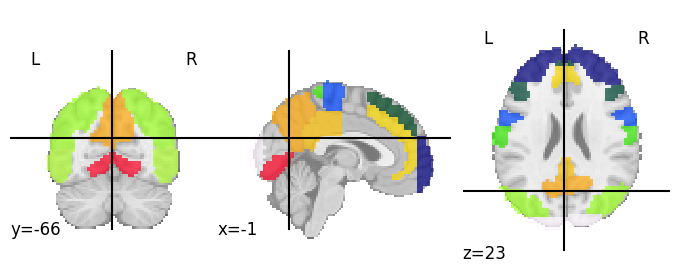

In [43]:
resampled_roi = image.resample_to_img(atlas_img, image.mean_img(fmri_file), interpolation='nearest')
roi_int = resampled_roi.get_fdata()
roi_int[~np.isin(roi_int, idx_best)] = 0
best_roi = image.new_img_like(resampled_roi, roi_int)
plotting.plot_roi(best_roi)